# Chapter08 代表的な連続型確率分布

- Numpy
  - 確率変数を「とりうる値」と「密度関数」から定義していく数式レベルの実装
- SciPy.stats
  - 実際の統計解析を行ううえで、便利な機能に触れつつ、確率分布の特徴について考察する

In [1]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline

In [2]:
# 関数の作成
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    """1次元の連続型確率変数の期待値 E(X)"""
    x_range, f = X
    def integrand(x):
        """被積分関数"""
        return g(x) * f(x)

    return integrate.quad(
        integrand,
        -np.inf, np.inf
    )[0]

def V(X, g=lambda x: x):
    """1次元の連続型確率変数の分散 V(X)"""
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        """被積分関数"""
        return (g(x) - mean)**2 * f(x)

    return integrate.quad(
        integrand,
        -np.inf, np.inf
    )[0]

def check_prob(X):
    """
    確率変数を引数に、その確率変数が確率の性質を満たしているか確認数する
    期待値と分散を返す
    """
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, "密度関数が負の値をとります。"

    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f"確率の和が{prob_sum}になりました。"

    print(f"期待値: {E(X):.3f}")
    print(f"分散: {V(X):.3f}")

def plot_prob(X, x_min, x_max):
    """
    確率変数と区間を引数に、
    その確率変数の密度関数と分布関数を図示する
    """
    x_range, f = X
    def F(x):
        """密度関数"""
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--', color='gray')
    ax.legend()
    plt.show()

## 8.1 正規分布

- 正規分布（normal distribution）
  - ガウス分布（Gaussian distribution）
  - とりうる値は、実数全体
  - $N(\mu, \sigma^2)$
  - パラメータ
    - $\mu$（実数）
    - $\sigma^2$（$\sigma$は正の実数）

#### 正規分布の密度関数

$N(\mu, \sigma^2)$の密度関数

$$
f(x) = \dfrac{1}{\sqrt{2\pi}\sigma}exp\left\{ -\dfrac{(x - \mu)^2}{2\sigma^2} \right\}
~~~ (-\infty < x < \infty)
$$

#### 正規分布の期待値と分散

$X \sim N(\mu, \sigma^2)$とするとき

$$
\begin{align*}
E(X) &= \mu
\\
V(X) &= \sigma^2
\end{align*}
$$

#### 正規分布の変換

$N \sim N(\mu, \sigma^2)$とするとき、任意の実数$a, b$に対して

$$
aX + b \sim N(a\mu + b, ~ a^2\sigma^2)
$$

が成り立つ。

これを利用することで、

$X \sim N(\mu, \sigma^2)$を標準化した確率変数$Z = (X - \mu)/\sigma$は、$N(0, 1)$に従うことがわかる。

- **標準正規分布（standard normal distribution）**
  - 標準化した正規分布$N(0, 1)$

In [3]:
# NumPy
# 正規分布の密度関数
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
            np.exp(-(x-mu)**2 / (2 * sigma**2))
    
    return x_range, f

In [4]:
# N(2, 0.5^2)に従う確率変数X
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
# N(2, 0.5^2)に従う確率変数Xの
# 期待値と分散
check_prob(X)

期待値: 2.000
分散: 0.250


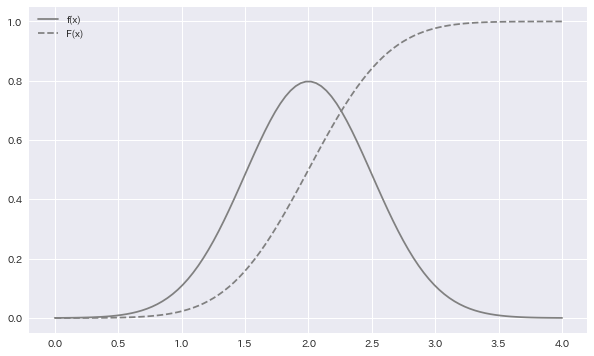

In [6]:
# N(2, 0.5^2)に従う確率変数Xの
# 密度関数と分布関数の図示
# 区間: [0, 4]
plot_prob(X, 0, 4)

In [7]:
# scipy.statsを使った実装
# 正規分布に従う確率変数
# stats.norm(μ, σ)
rv = stats.norm(2, 0.5)

In [8]:
# 期待値と分散
rv.mean(), rv.var()

(2.000, 0.250)

In [9]:
# 密度関数
rv.pdf(2)

0.798

In [10]:
# 分布関数
# 確率P(X <= x)
rv.cdf(1.7)

0.274

- **上側100α%点（upper 100α% point）**
  - $P(X \geq x) = \alpha$を満たすような$x$
  - 領域の面積が$\alpha$となるような左側の$x$座標に相当
- $z_\alpha$
  - $Z \sim N(0, 1)$とすると、$P(Z \geq z_\alpha) = \alpha$を満たす
- 標準正規分布は、$x=0$を中心に対称な形をしているので、$z_{1-\alpha} = -z_\alpha$が成り立つ

In [11]:
# 上側30%点を求める
rv.isf(0.3)

2.262

- **$100_\alpha\%$区間**
  - 確率が$\alpha$となる中央の区間
  - 領域の面積が$\alpha$となるような、$a, b$を求める
  - このときの左と右の余った部分の面積は等しくなる
  - $aとｂ$は$P(a \leq X \leq b) = \alpha$を満たし、
  - さらに$P(X \leq a) = P(X \geq b) = (1 - \alpha)/2$
  - このような区間$[a, b]$のこと

In [12]:
# 90%区間を求める
rv.interval(0.9)

(1.178, 2.822)

In [15]:
# 右と左に5%ずつ余っているので、
# a, bは次のようにも求めることができる
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

- 標準正規分布の場合、
  - $100(1 - \alpha)\%$区間を$z_\alpha$を使って、$[z_{1-\alpha/2}, z_{\alpha/2}]$で表すことができる
  - 標準正規分布の95%区間は$\alpha = 0.05$に対応することから、$[z_{0.975}, z_{0.025}]$と求めることができる

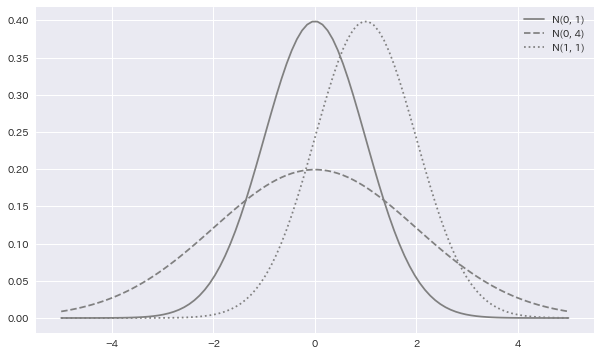

In [17]:
# 正規分布
# N(0, 1), N(0, 4), N(1, 1)を図示
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(
        xs, rv.pdf(xs),
        label=f'N({mu}, {sigma**2})', ls=ls, color='gray'
    )
ax.legend()

plt.show()

#### 正規分布のまとめ

|||
|:--:|:--:|
|パラメータ|$\mu, \sigma$|
|とりうる値|実数全体|
|密度関数|$\dfrac{1}{\sqrt{2\pi}\sigma}exp\left\{ -\dfrac{(x - \mu)^2}{2\sigma^2} \right\}$|
|期待値|$\mu$|
|分散|$\sigma^2$|
|scipy.stats|norm($\mu, \sigma$)|